In [4]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sma
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [6]:
water_quality_data = pd.read_csv('./data/Water Quality Testing.csv')
water_quality_data

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,7.25,23.1,4.5,7.8,342
1,2,7.11,22.3,5.1,6.2,335
2,3,7.03,21.5,3.9,8.3,356
3,4,7.38,22.9,3.2,9.5,327
4,5,7.45,20.7,3.8,8.1,352
...,...,...,...,...,...,...
495,496,7.01,20.8,4.6,7.1,327
496,497,7.31,22.5,3.8,9.4,361
497,498,7.02,21.2,4.7,7.5,334
498,499,7.25,23.0,3.9,8.7,359


In [7]:
water_quality_data.describe()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,7.161140,22.054400,4.169400,8.382200,344.362000
std,144.481833,0.107531,0.903123,0.397492,0.822396,13.038672
min,1.000000,6.830000,20.300000,3.100000,6.000000,316.000000
25%,125.750000,7.080000,21.200000,3.800000,7.800000,333.000000
50%,250.500000,7.160000,22.200000,4.200000,8.400000,344.000000
75%,375.250000,7.250000,22.900000,4.500000,9.100000,355.000000
max,500.000000,7.480000,23.600000,5.100000,9.900000,370.000000


In [8]:
water_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample ID                500 non-null    int64  
 1   pH                       500 non-null    float64
 2   Temperature (°C)         500 non-null    float64
 3   Turbidity (NTU)          500 non-null    float64
 4   Dissolved Oxygen (mg/L)  500 non-null    float64
 5   Conductivity (µS/cm)     500 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 23.6 KB


In [9]:
reg = linear_model.LinearRegression()
reg.fit(water_quality_data[['pH', 'Temperature (°C)', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)']], water_quality_data['Conductivity (µS/cm)'])

LinearRegression()

In [10]:
reg.intercept_

np.float64(-9.408149369271143)

In [11]:
reg.coef_

array([28.37130675,  2.41749122,  4.46858489,  9.38317072])

In [12]:
reg_pred = reg.intercept_ + reg.coef_
reg_pred

array([18.96315738, -6.99065815, -4.93956448, -0.02497865])

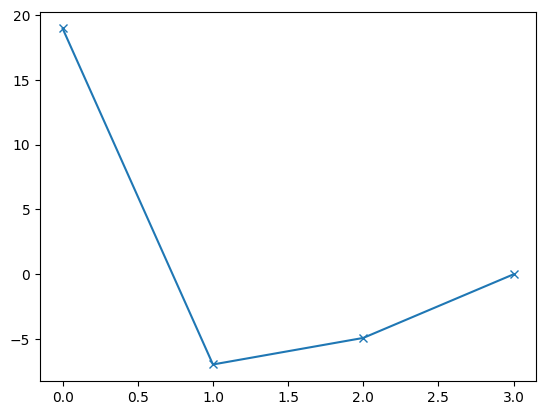

In [13]:
plt.plot(reg_pred, marker='x')
plt.show()

In [14]:
a = water_quality_data['pH']
b = water_quality_data['Temperature (°C)']

In [15]:
a = np.array(a)
b = np.array(b)

In [16]:
a = sma.add_constant(a)

In [17]:
model = sma.OLS(b, a).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     11.84
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           0.000629
Time:                        15:41:46   Log-Likelihood:                -652.15
No. Observations:                 500   AIC:                             1308.
Df Residuals:                     498   BIC:                             1317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8899      2.664      4.839      0.0

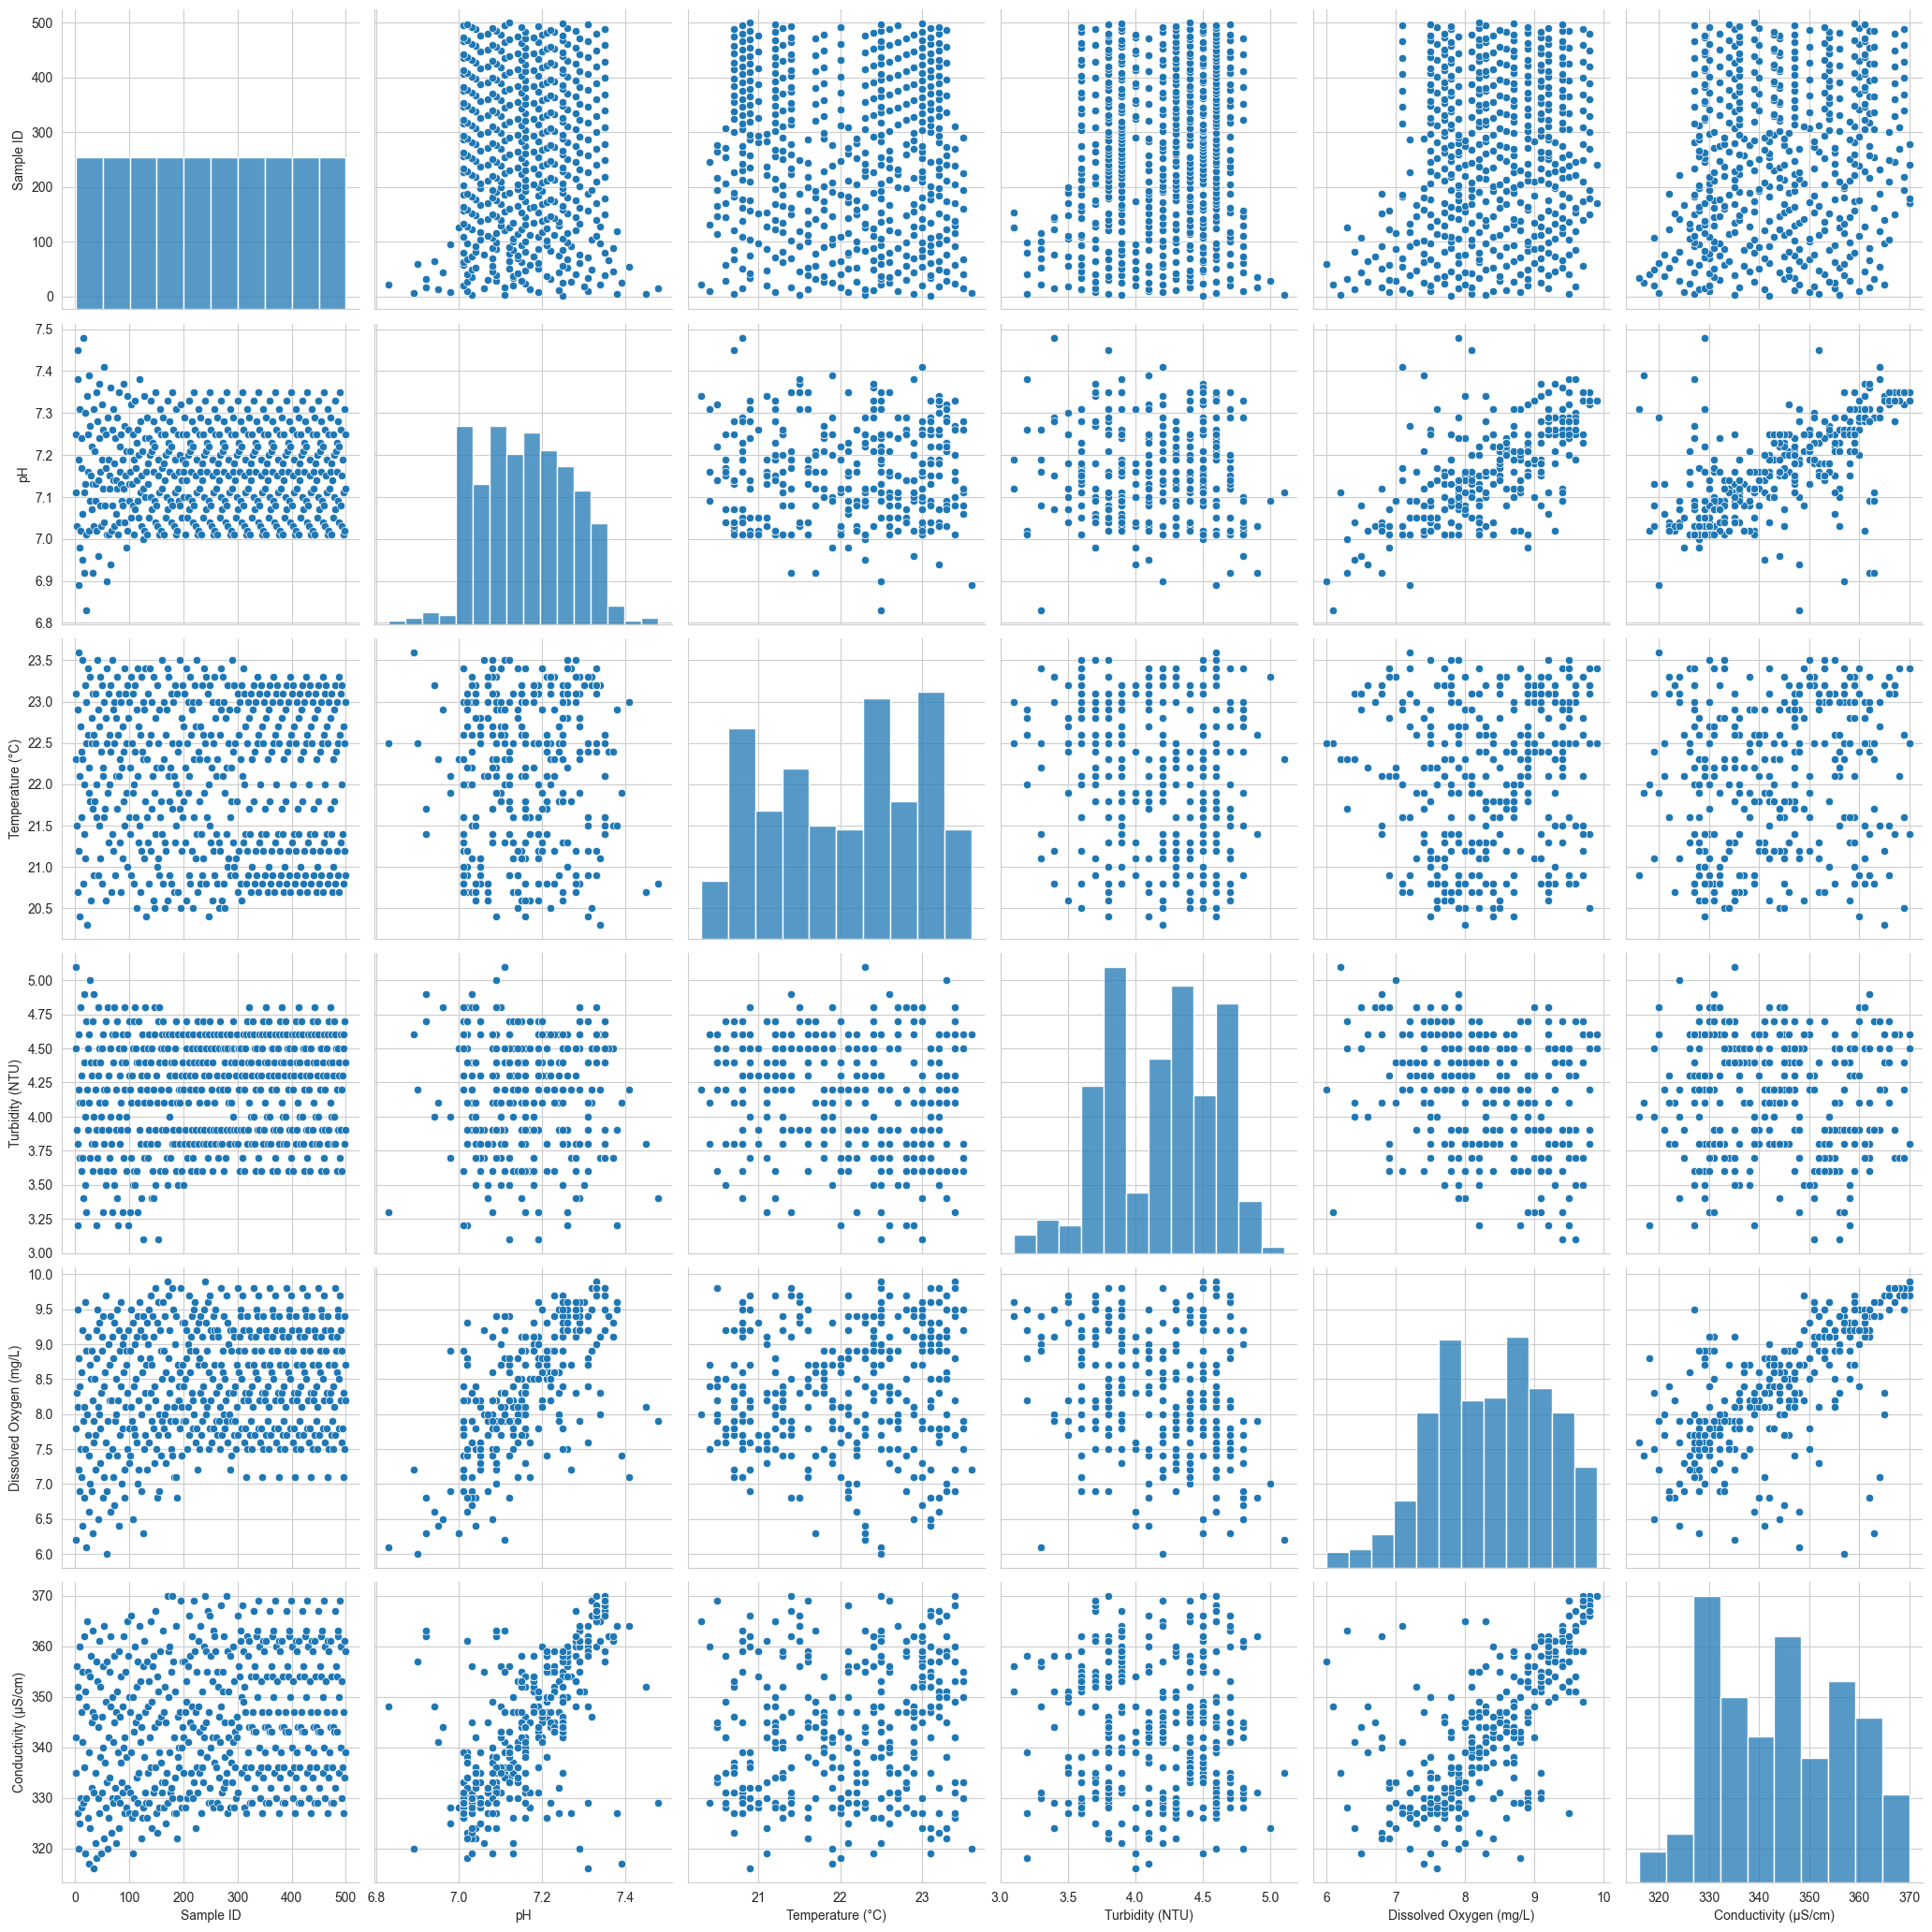

In [19]:
sns.set_style('whitegrid')
sns.pairplot(water_quality_data, kind='scatter', height=3.5)

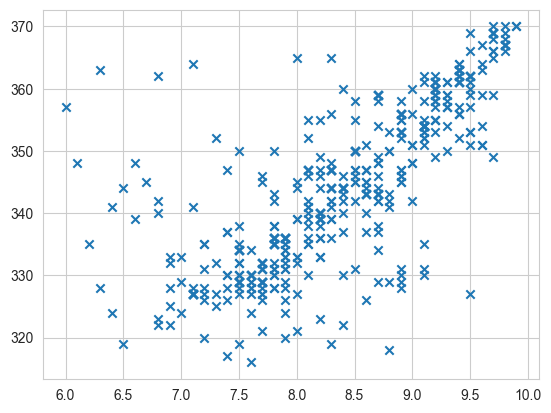

In [20]:
plt.scatter(x=water_quality_data['Dissolved Oxygen (mg/L)'], y=water_quality_data['Conductivity (µS/cm)'], marker='x')
plt.show()

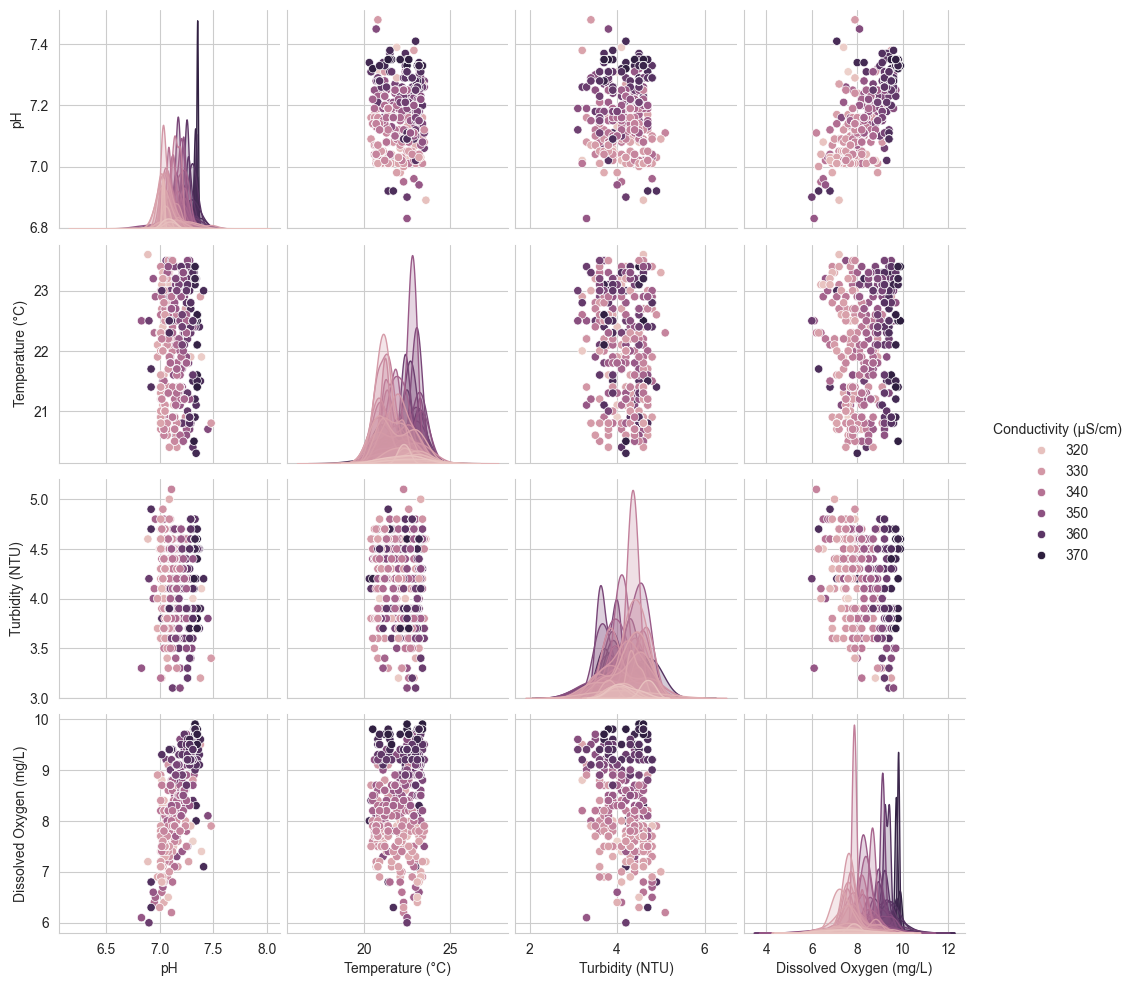

In [21]:
sns.set_style('whitegrid')
sns.pairplot(water_quality_data[['pH', 'Temperature (°C)', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Conductivity (µS/cm)']], hue='Conductivity (µS/cm)')

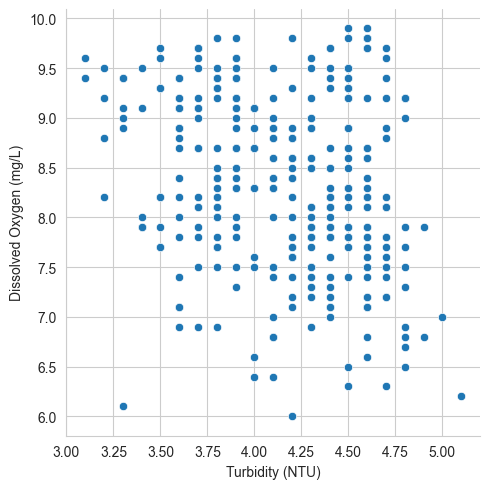

In [22]:
sns.relplot(water_quality_data, x='Turbidity (NTU)', y='Dissolved Oxygen (mg/L)')

<Axes: xlabel='Turbidity (NTU)', ylabel='Dissolved Oxygen (mg/L)'>

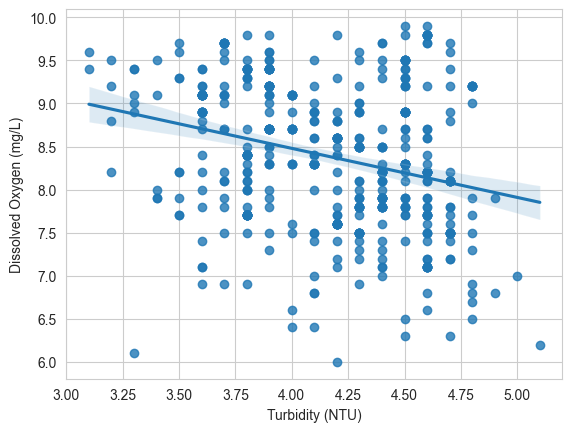

In [23]:
sns.regplot(water_quality_data, x='Turbidity (NTU)', y='Dissolved Oxygen (mg/L)')

<Axes: xlabel='pH', ylabel='Count'>

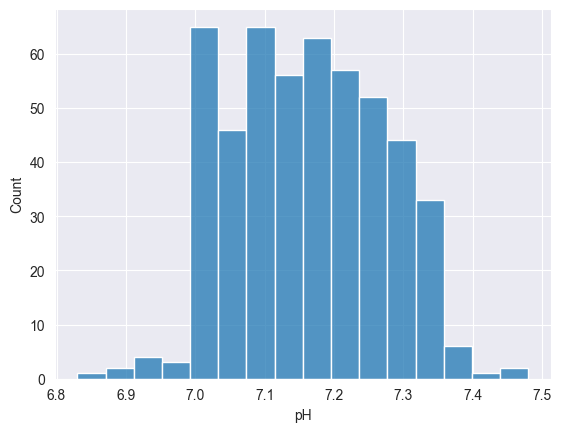

In [24]:
sns.set_style("darkgrid")
sns.histplot(water_quality_data, x='pH')

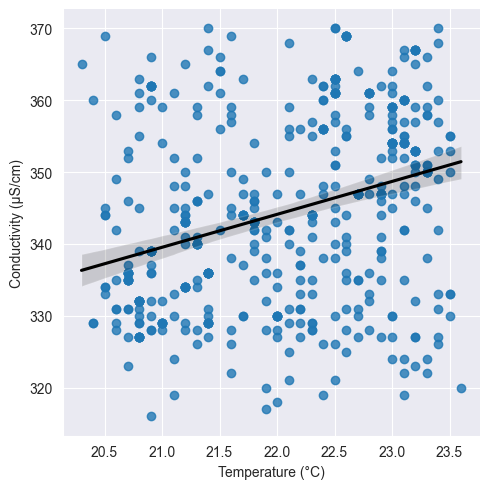

In [25]:
sns.lmplot(water_quality_data, x='Temperature (°C)', y='Conductivity (µS/cm)', line_kws={'color':'black'})

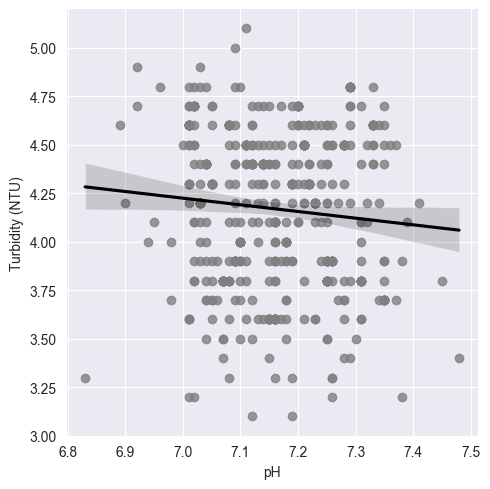

In [26]:
sns.lmplot(water_quality_data, x='pH', y='Turbidity (NTU)', scatter_kws={'color' : 'grey'}, line_kws={'color' : 'black'})

In [27]:
a = water_quality_data['Turbidity (NTU)']
b = water_quality_data['Dissolved Oxygen (mg/L)']

In [28]:
features = ['Turbidity (NTU)', 'Dissolved Oxygen (mg/L)']
a_train = water_quality_data[features]
a_test = water_quality_data[features]
b_train = water_quality_data['Conductivity (µS/cm)']

In [29]:
regre = linear_model.LinearRegression()
regre.fit(a_train, b_train)
prediction = regre.predict(a_test)

In [30]:
prediction

array([338.43669668, 320.81647817, 342.15651177, 354.28894645,
       339.19607402, 331.28775013, 349.774152  , 323.59890589,
       344.28636817, 335.94495261, 347.67989761, 325.69316029,
       319.01290743, 352.66338575, 334.93636122, 327.53233303,
       341.79462411, 356.85189453, 332.48021916, 353.20328345,
       311.75715487, 339.66476771, 337.17302364, 352.26589607,
       331.6496378 , 323.70571191, 346.34502056, 330.49277078,
       346.84931625, 324.03199757, 351.47091672, 320.34778448,
       339.59356369, 333.7438922 , 341.43273644, 344.25076617,
       335.87374859, 330.42156677, 353.52956911, 345.44323519,
       356.45440486, 341.36153242, 323.30822224, 339.23167603,
       357.39179223, 334.53887155, 331.68523981, 342.58960346,
       352.33710008, 352.26589607, 326.23305798, 353.4583651 ,
       342.98709313, 328.29171037, 346.81371425, 358.11556757,
       336.77553396, 323.16581421, 314.39130696, 340.99964476,
       351.00222303, 332.51582116, 343.49138882, 346.34

In [31]:
print(prediction.shape)

(500,)


In [32]:
submission = water_quality_data[['Sample ID']]
submission

,Sample ID
0,1
1,2
2,3
3,4
4,5
...,...
495,496
496,497
497,498
498,499


In [33]:
submission['Conductivity (µS/cm)'] = prediction

C:\Users\manju\AppData\Local\Temp\ipykernel_11500\315621562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Conductivity (µS/cm)'] = prediction


In [34]:
submission

,Sample ID,Conductivity (µS/cm)
0,1,338.436697
1,2,320.816478
2,3,342.156512
3,4,354.288946
4,5,339.196074
...,...,...
495,496,330.024077
496,497,355.623824
497,498,335.511861
498,499,347.211204


In [35]:
submission = water_quality_data[['Sample ID', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)']]
submission

,Sample ID,Turbidity (NTU),Dissolved Oxygen (mg/L)
0,1,4.5,7.8
1,2,5.1,6.2
2,3,3.9,8.3
3,4,3.2,9.5
4,5,3.8,8.1
...,...,...,...
495,496,4.6,7.1
496,497,3.8,9.4
497,498,4.7,7.5
498,499,3.9,8.7


In [36]:
submission['Conductivity (µS/cm)'] = prediction

C:\Users\manju\AppData\Local\Temp\ipykernel_11500\315621562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Conductivity (µS/cm)'] = prediction


In [37]:
submission

,Sample ID,Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,4.5,7.8,338.436697
1,2,5.1,6.2,320.816478
2,3,3.9,8.3,342.156512
3,4,3.2,9.5,354.288946
4,5,3.8,8.1,339.196074
...,...,...,...,...
495,496,4.6,7.1,330.024077
496,497,3.8,9.4,355.623824
497,498,4.7,7.5,335.511861
498,499,3.9,8.7,347.211204


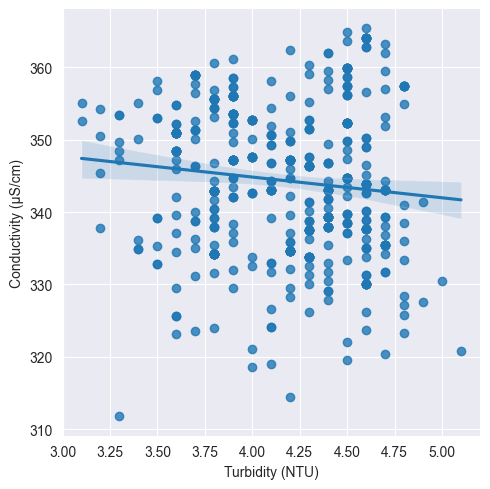

In [38]:
sns.lmplot(submission, x='Turbidity (NTU)', y='Conductivity (µS/cm)')

In [39]:
p = submission['Turbidity (NTU)']
q = submission['Conductivity (µS/cm)']

In [40]:
p = np.array(p)
q = np.array(q)

In [41]:
p = sma.add_constant(p)

In [42]:
model = sma.OLS(q, p).fit()

In [43]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.475
Date:                Wed, 23 Apr 2025   Prob (F-statistic):             0.0112
Time:                        15:42:06   Log-Likelihood:                -1859.8
No. Observations:                 500   AIC:                             3724.
Df Residuals:                     498   BIC:                             3732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        356.3115      4.717     75.532      0.0

In [44]:
columns = ['pH', 'Temperature (°C)', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)']

In [45]:
a_train = water_quality_data[columns]
a_test = water_quality_data[columns]
b_train = water_quality_data['Conductivity (µS/cm)']

In [46]:
Regression = linear_model.LinearRegression()
Regression.fit(a_train, b_train)
predictions = Regression.predict(a_test)

In [47]:
predictions

array([345.42523531, 327.18733718, 337.3259963 , 358.7722368 ,
       344.98445953, 331.23726655, 347.17231884, 323.32776971,
       344.4427559 , 336.45846252, 350.06209798, 328.93934804,
       320.05597735, 350.5632546 , 342.41327975, 324.35723225,
       341.16210475, 359.50667217, 332.1364524 , 349.58957734,
       310.74509965, 341.74573618, 342.658748  , 353.7334607 ,
       340.95552655, 325.91114629, 347.71990859, 336.09708035,
       342.6657376 , 328.02028966, 352.55137219, 319.49717728,
       341.75222038, 337.69810644, 340.70055324, 344.58785453,
       338.29129123, 334.80906531, 355.09141723, 339.81460477,
       359.6198933 , 338.90714512, 325.85651164, 344.26372594,
       359.03656225, 337.063885  , 332.89839142, 339.94859688,
       357.97446369, 347.6796981 , 330.38316199, 353.18397756,
       338.34291707, 341.8141003 , 342.93672807, 358.05942741,
       336.12888556, 326.87478901, 315.81450046, 345.93799066,
       352.30161083, 329.61765223, 345.13262731, 343.94

In [48]:
water_quality_data['Prediction of Conductivity (µS/cm)'] = predictions
water_quality_data

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm),Prediction of Conductivity (µS/cm)
0,1,7.25,23.1,4.5,7.8,342,345.425235
1,2,7.11,22.3,5.1,6.2,335,327.187337
2,3,7.03,21.5,3.9,8.3,356,337.325996
3,4,7.38,22.9,3.2,9.5,327,358.772237
4,5,7.45,20.7,3.8,8.1,352,344.984460
...,...,...,...,...,...,...,...
495,496,7.01,20.8,4.6,7.1,327,326.934531
496,497,7.31,22.5,3.8,9.4,361,357.562083
497,498,7.02,21.2,4.7,7.5,334,332.385367
498,499,7.25,23.0,3.9,8.7,359,350.947189
